In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [23]:
#body_health.csv"
df_body=pd.read_csv("C:\\Users\\ACER\\OneDrive\\Desktop\\luminar\\ml_project\\final\\data\\body_health.csv")
df_body

,Car_ID,Rust_Level,Structural_Strength_Score,Damage_Severity,Body_Remaining_Years
0,1,75.301139,NaN,3.937374,1.000000
1,2,13.565997,5.612336,8.675983,1.000000
2,3,50.709009,7.831854,4.790108,1.000000
3,4,17.758096,3.226358,2.845132,1.000000
4,5,61.678011,7.236223,6.714925,1.000000
...,...,...,...,...,...
5995,5996,77.706107,6.022119,8.047980,1.000000
5996,5997,43.755312,7.169179,5.201490,1.929669
5997,5998,19.021298,3.135701,9.442002,1.000000
5998,5999,66.205150,6.471691,4.761526,1.000000


In [24]:
df_body.shape

(6000, 5)

In [25]:
df_body.head()

,Car_ID,Rust_Level,Structural_Strength_Score,Damage_Severity,Body_Remaining_Years
0,1,75.301139,NaN,3.937374,1.0
1,2,13.565997,5.612336,8.675983,1.0
2,3,50.709009,7.831854,4.790108,1.0
3,4,17.758096,3.226358,2.845132,1.0
4,5,61.678011,7.236223,6.714925,1.0


In [26]:
df_body.tail()

,Car_ID,Rust_Level,Structural_Strength_Score,Damage_Severity,Body_Remaining_Years
5995,5996,77.706107,6.022119,8.047980,1.000000
5996,5997,43.755312,7.169179,5.201490,1.929669
5997,5998,19.021298,3.135701,9.442002,1.000000
5998,5999,66.205150,6.471691,4.761526,1.000000
5999,6000,27.248727,4.599519,5.262353,1.000000


In [27]:
df_body.columns

Index(['Car_ID', 'Rust_Level', 'Structural_Strength_Score', 'Damage_Severity',
       'Body_Remaining_Years'],
      dtype='object')

In [28]:
df_body.isna().sum()    

Car_ID                         0
Rust_Level                   326
Structural_Strength_Score    134
Damage_Severity                0
Body_Remaining_Years           0
dtype: int64

In [29]:
df_body.dtypes

Car_ID                         int64
Rust_Level                   float64
Structural_Strength_Score    float64
Damage_Severity              float64
Body_Remaining_Years         float64
dtype: object

In [30]:
df_body.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Car_ID                     6000 non-null   int64  
 1   Rust_Level                 5674 non-null   float64
 2   Structural_Strength_Score  5866 non-null   float64
 3   Damage_Severity            6000 non-null   float64
 4   Body_Remaining_Years       6000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 234.5 KB


In [31]:
df_body.describe()

,Car_ID,Rust_Level,Structural_Strength_Score,Damage_Severity,Body_Remaining_Years
count,6000.000000,5674.000000,5866.000000,6000.000000,6000.000000
mean,3000.500000,38.508467,5.622270,4.520002,1.995377
std,1732.195139,19.461862,2.004544,2.021809,1.656201
min,1.000000,0.808486,0.313777,0.067575,1.000000
25%,1500.750000,23.041558,4.175167,2.943473,1.000000
50%,3000.500000,37.219623,5.723213,4.448493,1.000000
75%,4500.250000,52.441901,7.174231,6.022791,2.575267
max,6000.000000,93.654323,9.959410,9.780421,11.434827


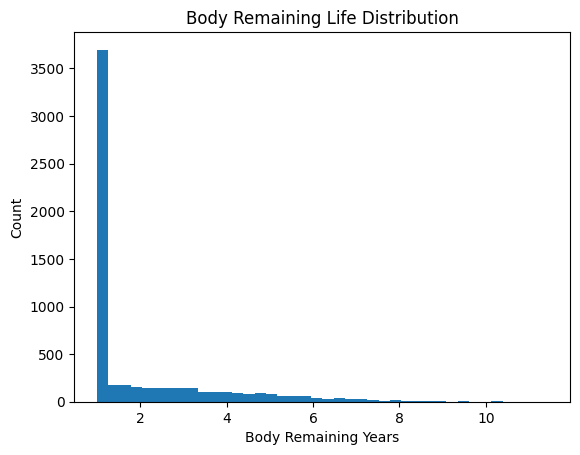

In [32]:
plt.hist(df_body["Body_Remaining_Years"], bins=40)
plt.xlabel("Body Remaining Years")
plt.ylabel("Count")
plt.title("Body Remaining Life Distribution")
plt.show()


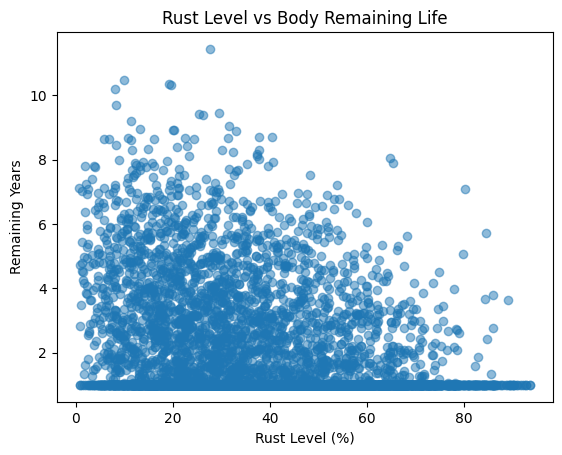

In [33]:
plt.scatter(
    df_body["Rust_Level"],
    df_body["Body_Remaining_Years"],
    alpha=0.5
)
plt.xlabel("Rust Level (%)")
plt.ylabel("Remaining Years")
plt.title("Rust Level vs Body Remaining Life")
plt.show()


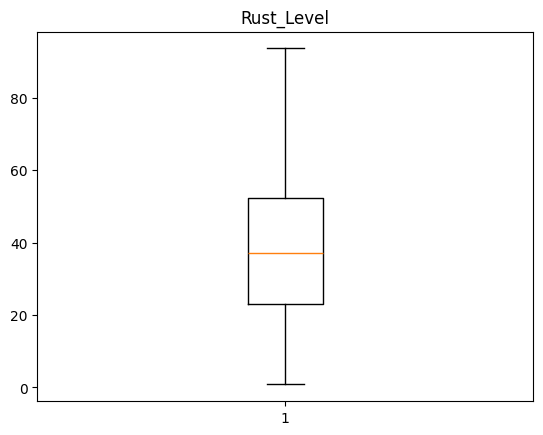

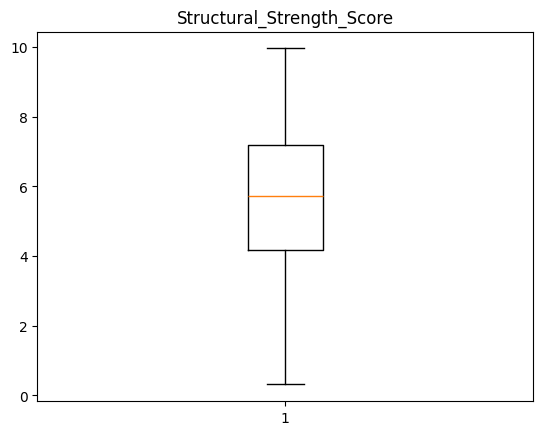

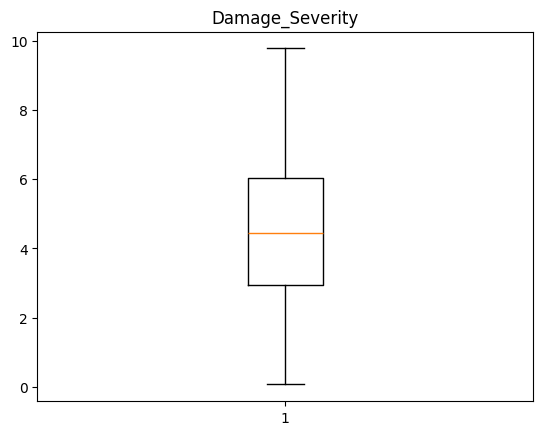

In [34]:
features = [
    "Rust_Level",
    "Structural_Strength_Score",
    "Damage_Severity"
]

for col in features:
    plt.boxplot(df_body[col].dropna())
    plt.title(col)
    plt.show()


In [35]:
x = df_body.drop(
    columns=["Body_Remaining_Years", "Car_ID"]
)
y = df_body["Body_Remaining_Years"]

for col in x.columns:
    x[col] = x[col].fillna(x[col].median())


In [36]:
df_body.loc[df_body["Rust_Level"] > 100, "Rust_Level"] = df_body["Rust_Level"].median()


In [37]:
for col in x.columns:
    lower = x[col].quantile(0.01)
    upper = x[col].quantile(0.99)
    x[col] = x[col].clip(lower, upper)


In [38]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42
)


In [39]:
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=8,
    random_state=42
)


model.fit(x_train, y_train)


,n_estimators,300
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,8
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
y_pred = model.predict(x_test)

print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2  :", r2_score(y_test, y_pred))


MAE : 0.5863321489096366
RMSE: 0.9473565958544962
R2  : 0.6775333381658766


In [42]:
import joblib

joblib.dump(model, "body_model.pkl")

['body_model.pkl']